In [ ]:
## Mounting Google drive at colab
from google.colab import drive
drive.mount('/content/drive')

## Path where 
path1='/content/drive/MyDrive/Colab Notebooks/GTSRB_subset_2/class1'
path2='/content/drive/MyDrive/Colab Notebooks/GTSRB_subset_2/class2'

Mounted at /content/drive


In [ ]:
import glob
import cv2
# glob returns the path of each image file.
files1 = glob.glob("/content/drive/MyDrive/Colab Notebooks/GTSRB_subset_2/class1/*.jpg")
files1 = sorted(files1)


files2 = glob.glob("/content/drive/MyDrive/Colab Notebooks/GTSRB_subset_2/class2/*.jpg")
files2 = sorted(files2)

# Image will be stored at cv_img
# Image has been transformed to greyscale. 
class1 = []
class2 = []

for img in files1:
    n= cv2.imread(img)
    class1.append(n)
    #class1.append(cv2.cvtColor(n, cv2.COLOR_BGR2GRAY))

for img in files2:
    n= cv2.imread(img)
    class2.append(n)
    #class2.append(cv2.cvtColor(n, cv2.COLOR_BGR2GRAY))

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


y1 = np.zeros(len(class1), dtype= np.int8)
y2 = np.ones(len(class2), dtype= np.int8)
y3 = np.concatenate([y1, y2])
x3 = np.concatenate([class1, class2])

train_len = int(len(x3) * 0.8)
train_x, test_x, train_y, test_y  = train_test_split(x3, y3, train_size=train_len, shuffle=True, stratify=y3)
train_y = np.asarray(train_y).astype('float32').reshape((-1,1))
test_y = np.asarray(test_y).astype('float32').reshape((-1,1))

print(len(x3), len(x3),len(y1) ,len(y2))
print('train and test set',len(train_x), len(train_y),len(test_x), len(test_y), train_y.shape, test_y.shape)

660 660 450 210
train and test set 528 528 132 132 (528, 1) (132, 1)


In [ ]:
# https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

model = Sequential()
model.add(keras.Input(shape=(64, 64, 3) ))

model.add(layers.Conv2D(10, (3,3), strides=2, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", input_shape=( 31, 31, 10) ))

model.add(layers.Conv2D(10, (3,3), strides=2, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", input_shape=(7, 7, 10)) )

model.add(layers.Flatten())

model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 31, 31, 10)        280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 10)          910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 10)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 90)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

Epoch 1/20
17/17 [==============================] - 1s 16ms/step - loss: 576553.5625 - mse: 0.3068 - accuracy: 0.6515
Epoch 2/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6654 - mse: 0.2362 - accuracy: 0.6818
Epoch 3/20
17/17 [==============================] - 0s 17ms/step - loss: 0.6519 - mse: 0.2295 - accuracy: 0.6818
Epoch 4/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6434 - mse: 0.2254 - accuracy: 0.6818
Epoch 5/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6376 - mse: 0.2226 - accuracy: 0.6818
Epoch 6/20
17/17 [==============================] - 0s 15ms/step - loss: 0.6335 - mse: 0.2206 - accuracy: 0.6818
Epoch 7/20
17/17 [==============================] - 0s 17ms/step - loss: 0.6310 - mse: 0.2195 - accuracy: 0.6818
Epoch 8/20
17/17 [==============================] - 0s 15ms/step - loss: 0.6292 - mse: 0.2186 - accuracy: 0.6818
Epoch 9/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6280 - mse: 0.21

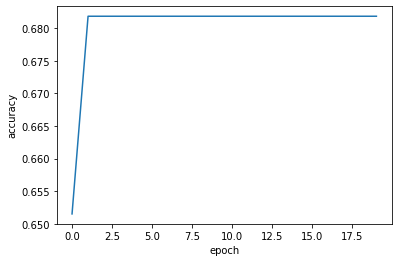

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.05)
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['mse','accuracy'])
num_of_epochs = 20

tr_hist = model.fit(train_x, train_y, epochs=num_of_epochs, verbose=1,batch_size=32)

plt.plot(tr_hist.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['opetus'], loc='upper right')
plt.show()

In [ ]:
prediction = model.predict(test_x)
model.evaluate(test_x, y = test_y,verbose=1)
# Training set accuracy is 0.6818
# Test set accuracy is 0.6818

5/5 [==============================] - 0s 7ms/step - loss: 0.6256 - mse: 0.2170 - accuracy: 0.6818


[0.6255534887313843, 0.21696925163269043, 0.6818181872367859]

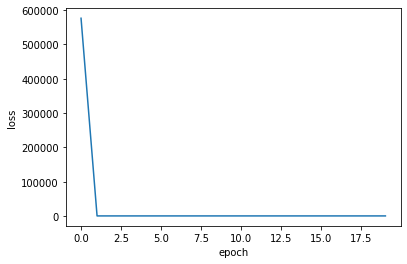

In [ ]:
plt.plot(tr_hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['opetus'], loc='upper right')
plt.show()

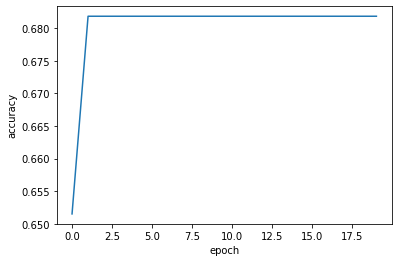

In [ ]:
plt.plot(tr_hist.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['opetus'], loc='upper right')
plt.show()